In [ ]:

!pip install opencv-python-headless mtcnn
!pip install scikit-learn


import cv2
import numpy as np
import os
from mtcnn import MTCNN
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

print("라이브러리 설치 완료!")


라이브러리 설치 완료!


In [ ]:
# LFW 데이터셋 다운로드
print("LFW 데이터셋 다운로드 중...")
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.5)

# 이미지와 라벨 확인
images = lfw_people.images
labels = lfw_people.target
target_names = lfw_people.target_names

print(f"총 이미지 수: {len(images)}")
print(f"라벨 수: {len(target_names)}")


LFW 데이터셋 다운로드 중...
총 이미지 수: 1560
라벨 수: 12


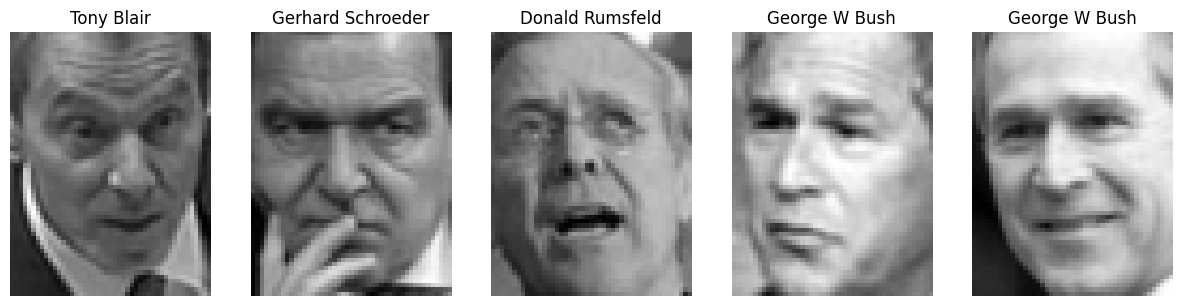

In [ ]:
# 예시 이미지 출력
fig, axes = plt.subplots(1, 5, figsize=(15, 8))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(target_names[labels[i]])
    ax.axis("off")
plt.show()


In [ ]:
# MTCNN 얼굴 감지기 초기화
detector = MTCNN()

# 비디오 파일 읽기 (업로드한 비디오 경로 설정)
video_path = "test video.mp4"  # 여기에 비디오 파일 경로를 입력하세요
cap = cv2.VideoCapture(video_path)

# 출력 비디오 저장 설정
output_path = "output_video.avi"
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

# 비디오 프레임 처리
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 얼굴 감지
    faces = detector.detect_faces(frame)

    # 감지된 얼굴에 대해 박스 그리기
    for face in faces:
        x, y, width, height = face['box']
        confidence = face['confidence']

        # 얼굴 박스 및 신뢰도 표시
        if confidence > 0.90:
            cv2.rectangle(frame, (x, y), (x+width, y+height), (0, 255, 0), 2)
            cv2.putText(frame, f"Confidence: {confidence:.2f}",
                        (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # 비디오에 프레임 저장
    out.write(frame)

    # 화면에 실시간 표시 (Colab에서는 지원하지 않을 수 있음)
    # cv2.imshow("Face Detection", frame)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

# 자원 해제
cap.release()
out.release()
cv2.destroyAllWindows()
print(f"영상 처리 완료! 결과 비디오 저장 경로: {output_path}")


KeyboardInterrupt: 

In [1]:
from IPython.display import HTML
from base64 import b64encode

# 비디오 파일 읽어서 base64로 인코딩
video_file = open(output_path, "rb").read()
video_base64 = b64encode(video_file).decode()

# 비디오 재생
HTML(f"""
<video width="640" height="480" controls>
  <source src="data:video/mp4;base64,{video_base64}" type="video/mp4">
</video>
""")


NameError: name 'output_path' is not defined